In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import shapiro
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_origin = pd.read_csv('/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv')

df_origin['person_emp_length'].fillna(df_origin['person_emp_length'].mean(), inplace=True)
df_origin['loan_int_rate'].fillna(df_origin['loan_int_rate'].mean(), inplace=True)


df = df.drop(columns=['id'])
df = pd.concat([df, df_origin],axis=0)


numerical_col  = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_col = ['person_home_ownership', 'loan_intent', 'loan_grade']

In [17]:
print("Dataset:")
print(df.head())

print("\n\nDataset Info:")
print(df.info())

print("\n\nSummary Statistics:")
print(df.describe())

print("\n\nMissing Values:")
print(df.isnull().sum())

for col in categorical_col:
    print(f"\nUnique values in {col}: {len(df[col].unique())}")

Dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          37          35000                  RENT                0.0   
1          22          56000                   OWN                6.0   
2          29          28800                   OWN                8.0   
3          30          70000                  RENT               14.0   
4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N   

## This bar plot displays the count of approved and rejected loans. It provides a quick overview of class balance in the target variable, loan_status. If the classes are imbalanced, it might affect model performance.

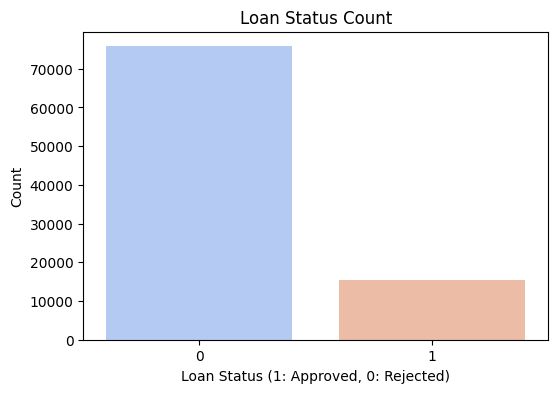

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', palette='coolwarm')
plt.title("Loan Status Count")
plt.xlabel("Loan Status (1: Approved, 0: Rejected)")
plt.ylabel("Count")
plt.show()

## This grouped bar plot shows how different categories of a feature (e.g., loan_intent, loan_grade) relate to loan approval and rejection rates.

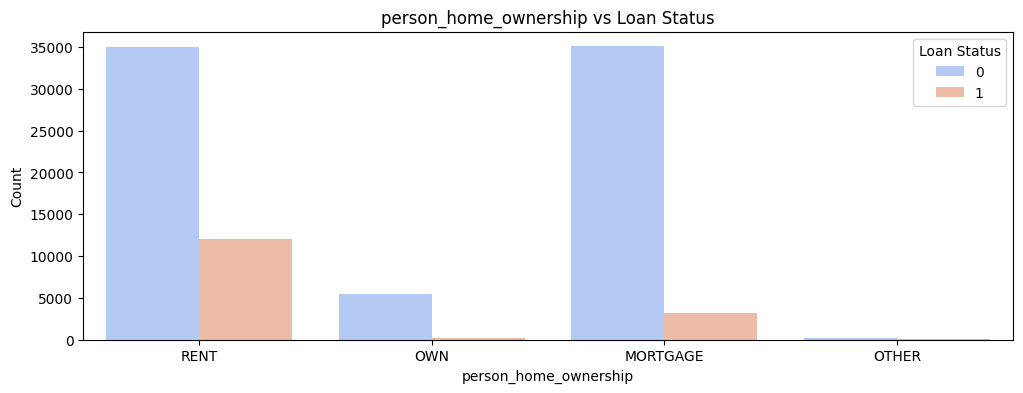

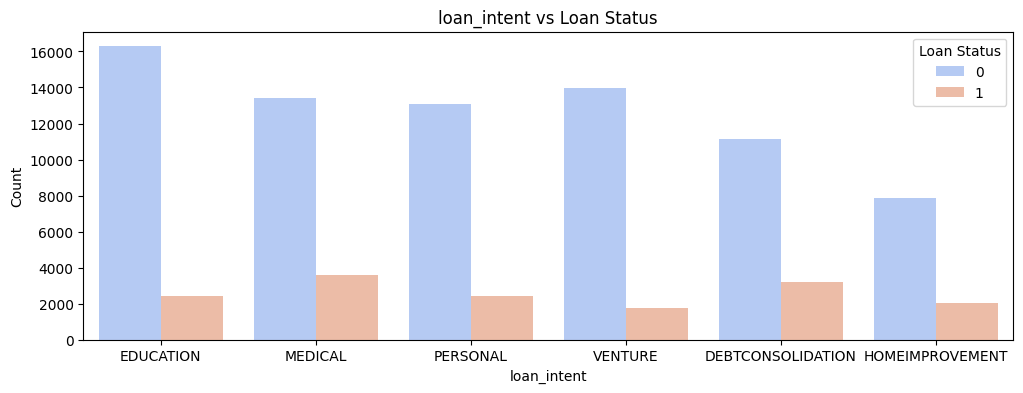

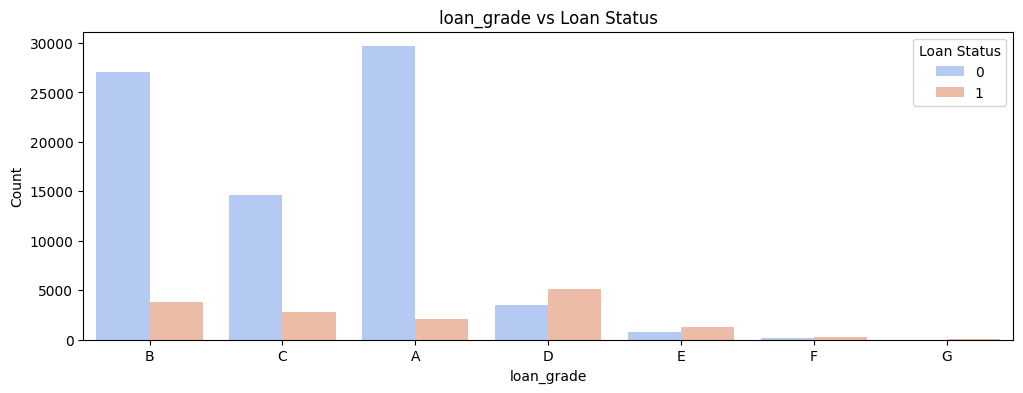

In [22]:
for col in categorical_col:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=col, hue='loan_status', palette='coolwarm')
    plt.title(f"{col} vs Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()


## This heatmap shows pairwise correlations between numerical variables. Strong positive or negative correlations can indicate multicollinearity. Additionally, a high correlation with loan_status suggests a feature's predictive potential.

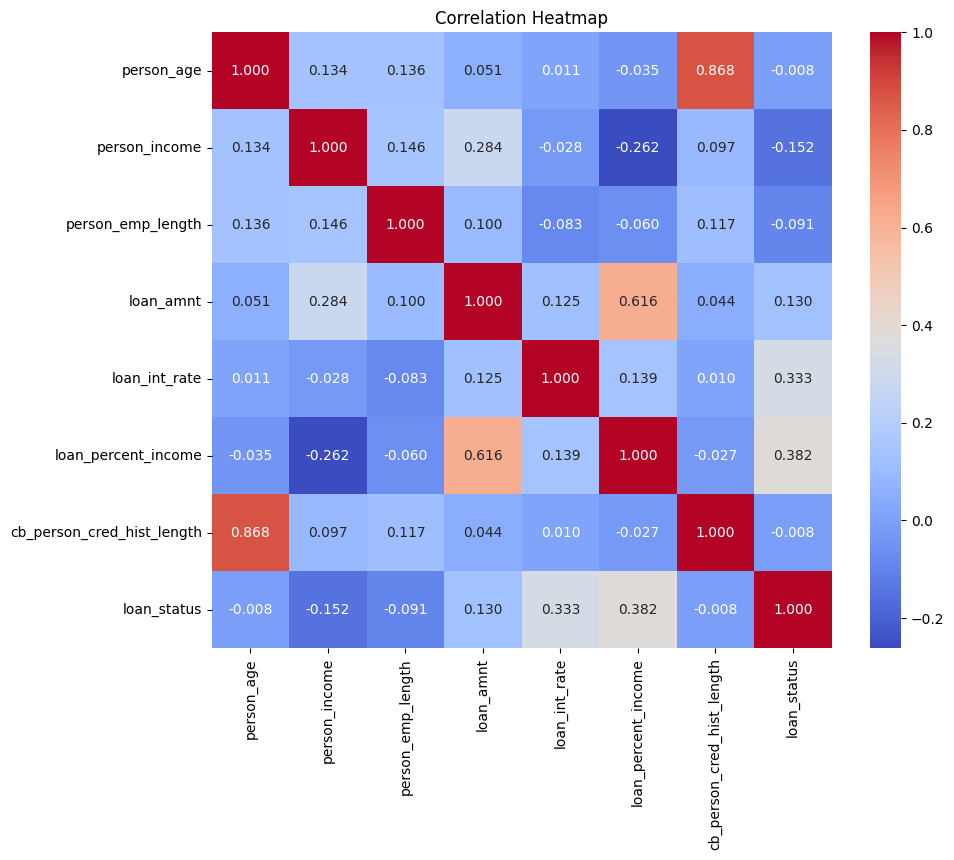

In [25]:
corr = df[numerical_col + ['loan_status']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

## The pairplot visualizes pairwise relationships between numerical features (e.g., person_income vs. loan_amnt) and how these relationships vary across loan statuses. The diagonal shows the distribution of each variable, while off-diagonal scatterplots reveal trends or clusters.

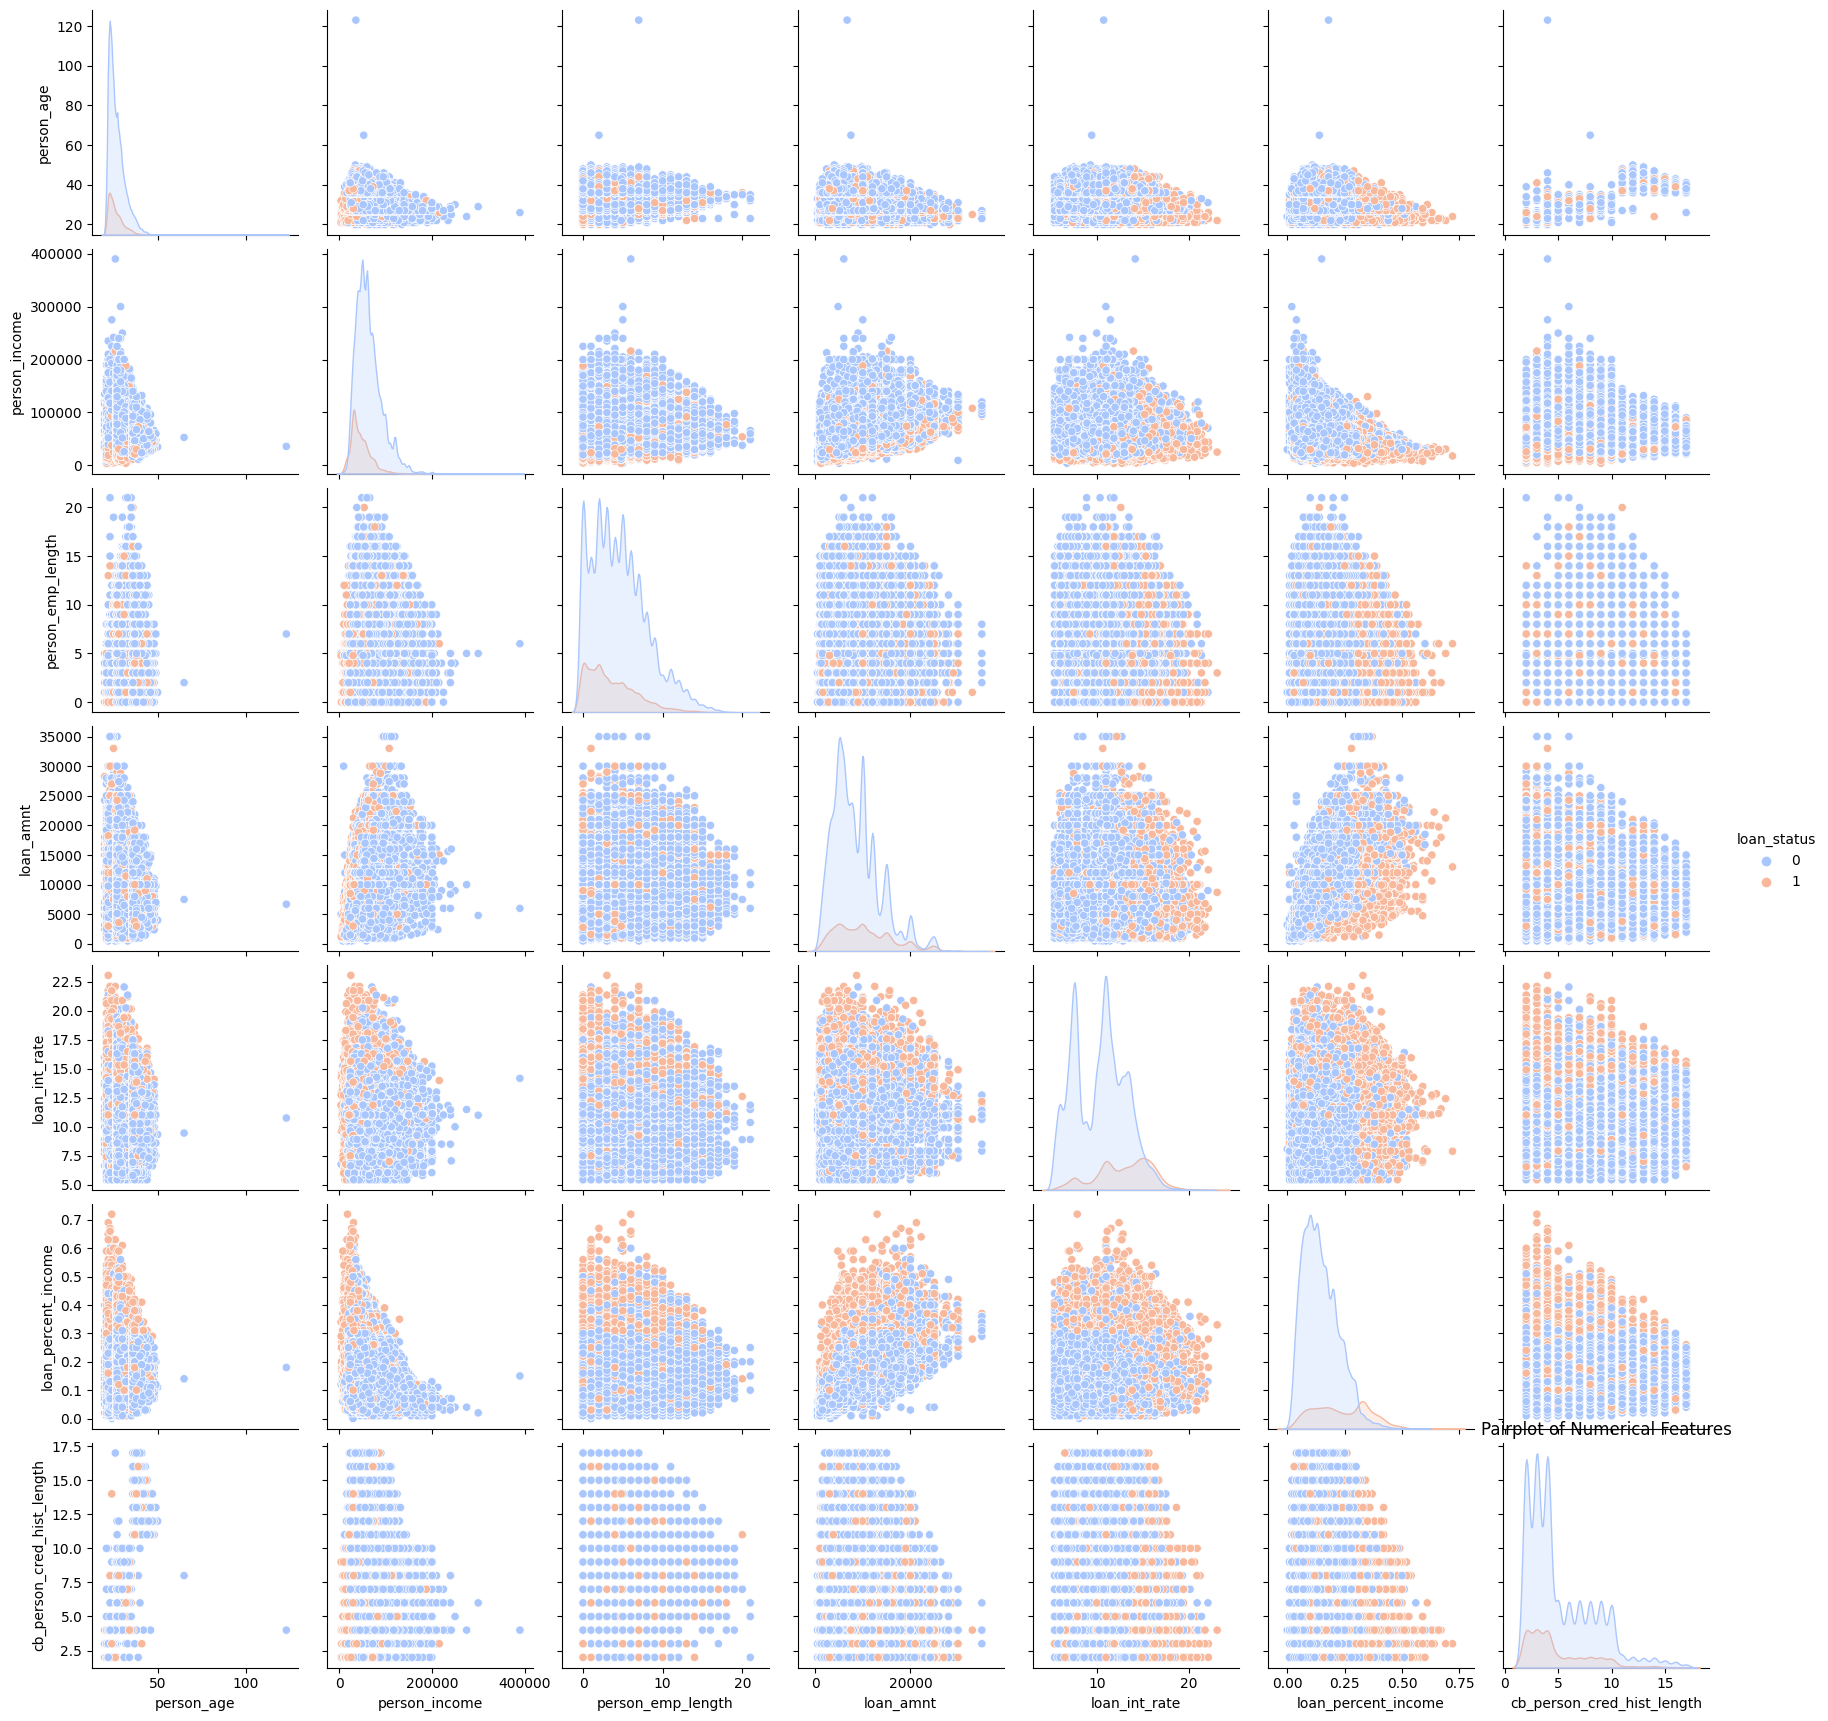

In [49]:
sns.pairplot(df, vars=numerical_col, hue='loan_status', palette='coolwarm', diag_kind='kde')
plt.title("Pairplot of Numerical Features")
plt.show()

## The pairplot shows how anomalies differ from normal data points across multiple numerical features. 

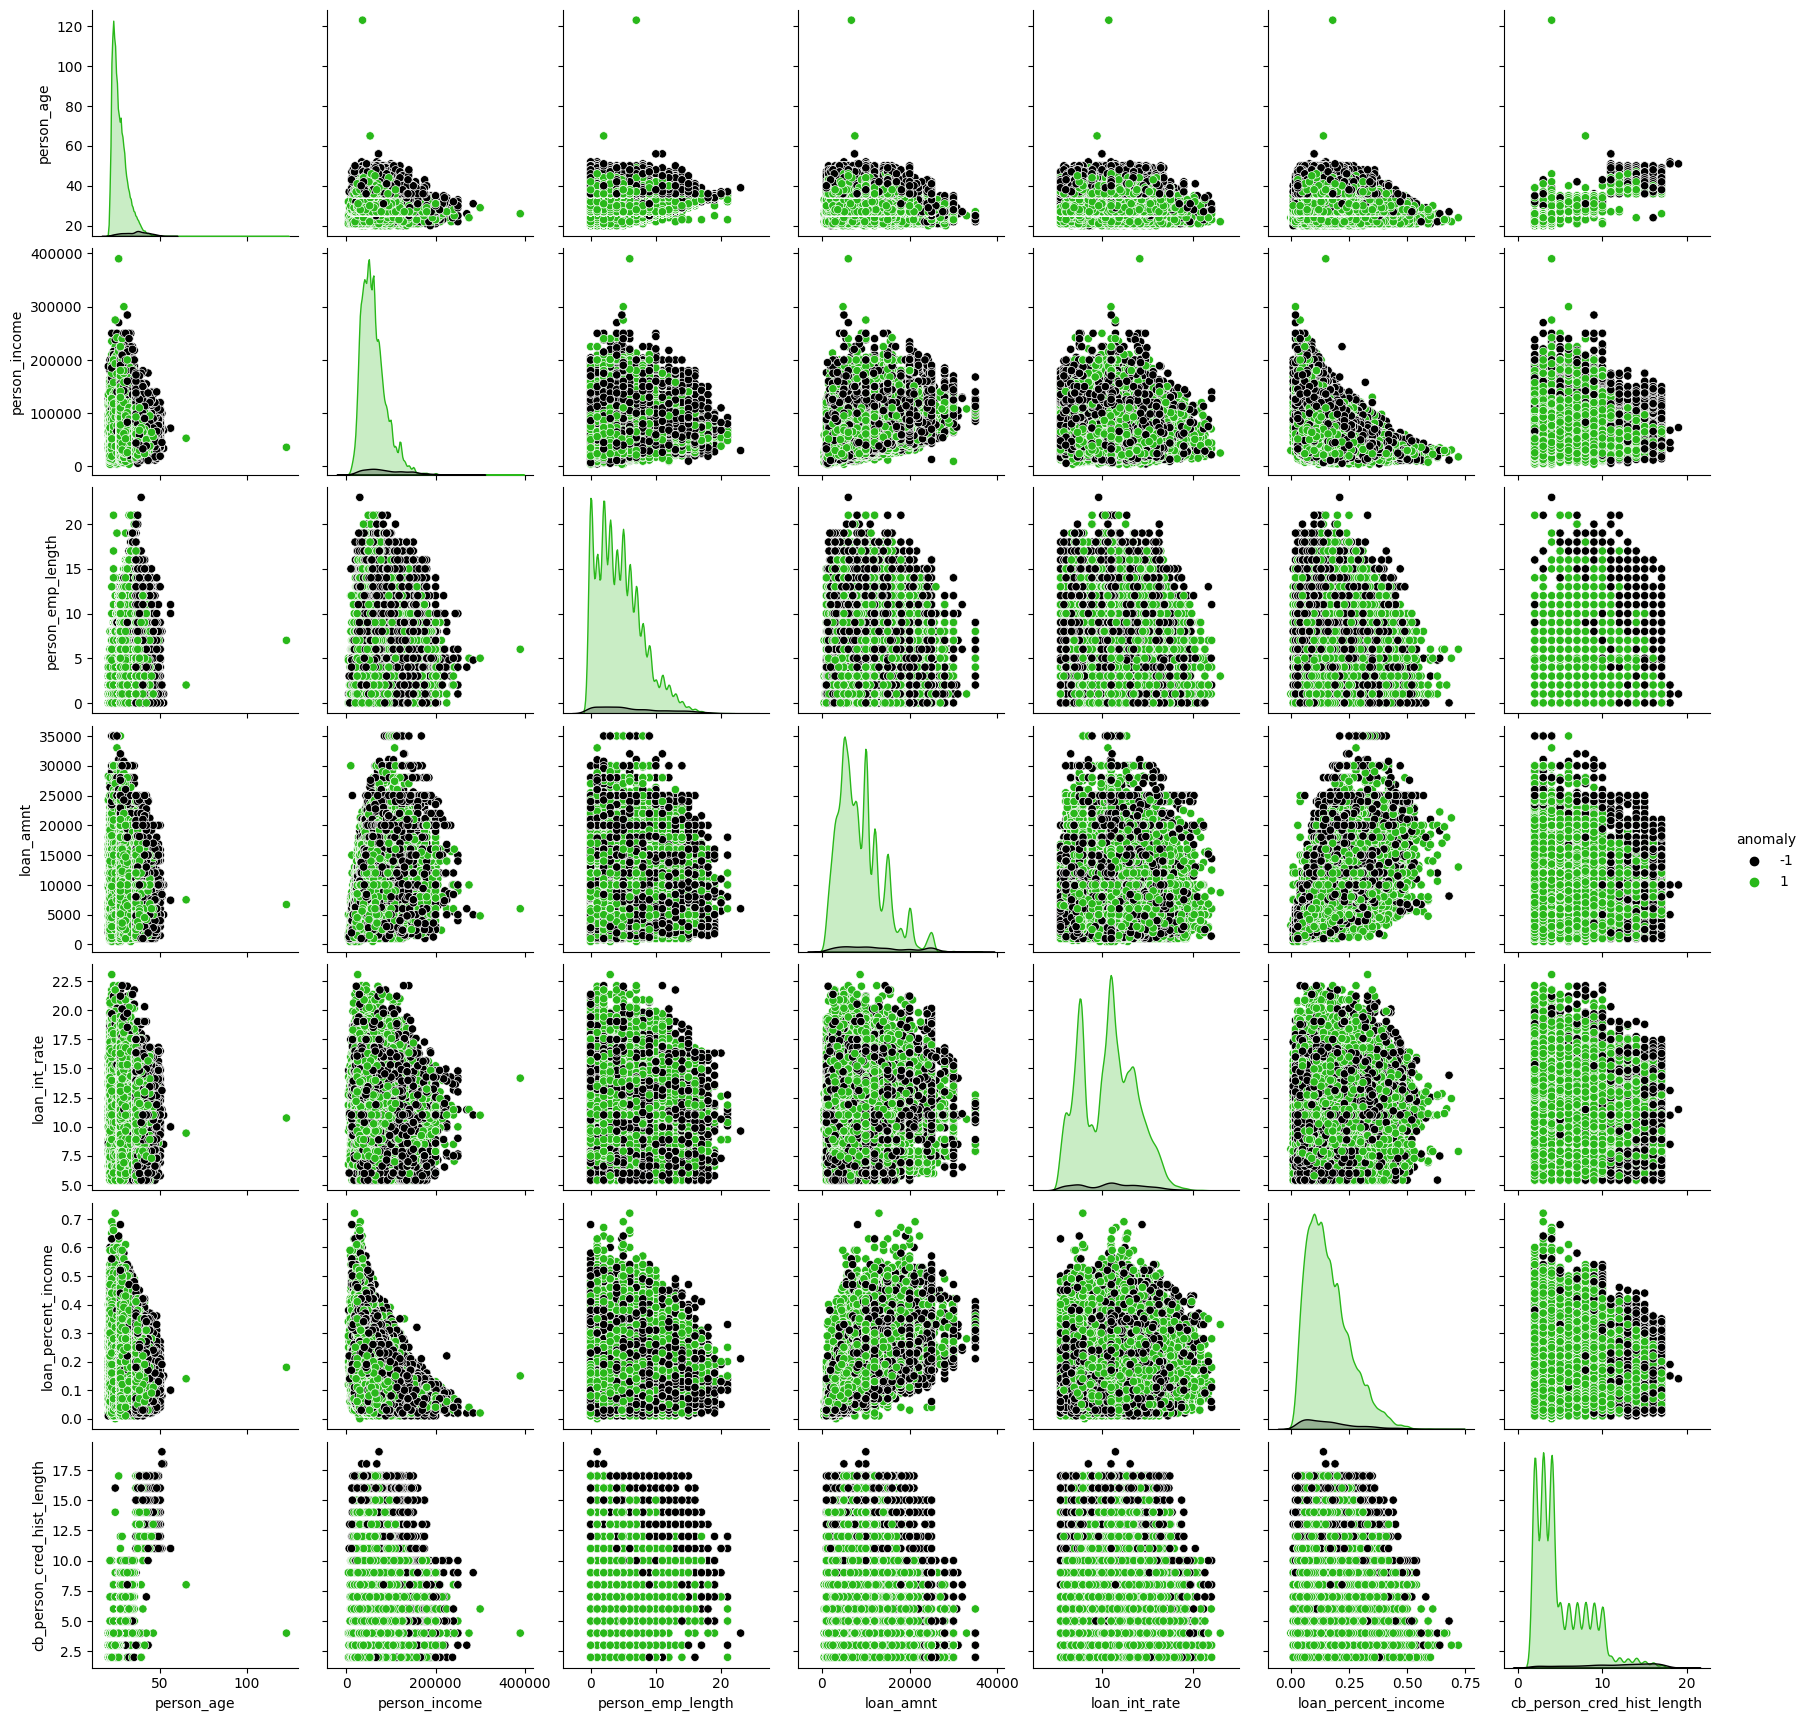

Original DataFrame shape: (86664, 14)
Filtered DataFrame shape: (82330, 14)


In [47]:
anomaly_inputs = numerical_col
model_IF = IsolationForest(contamination=0.05, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=['#000000', '#29b81a'])
plt.show()

print(f"Original DataFrame shape: {df.shape}")

df = df[df['anomaly'] == 1].reset_index(drop=True)

print(f"Filtered DataFrame shape: {df.shape}")